# Simple example for analysis and visualization of images in this repo

In [ ]:
from utils import utils
import matplotlib.pyplot as plt

Paths to folder with images and image types to visualize

In [3]:
data_base_path = './Data'
processed_base_path = './Data_processed'
subfolders = ['test', 'train', 'val']
image_types = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

Visualize some images

In [ ]:
for ty in image_types:
    print(ty)
    img_paths = utils.get_images([data_base_path] + ty, n=9)
    utils.plot_grid_images(img_paths)
    print(img_paths)

Loads all images for analysis

In [ ]:
# get path to all images
img_paths = []
for subfolder in subfolders:
    for ty in image_types:
        folder_path = f"{data_base_path}/{subfolder}/{ty}"
        img_paths += utils.get_image_paths(folder_path=folder_path)

# load images in parallel
load_img = lambda path: utils.load_image(path, grayscale=True)
imgs = Parallel(n_jobs=-1)(delayed(load_img)(img_path) for img_path in img_paths)

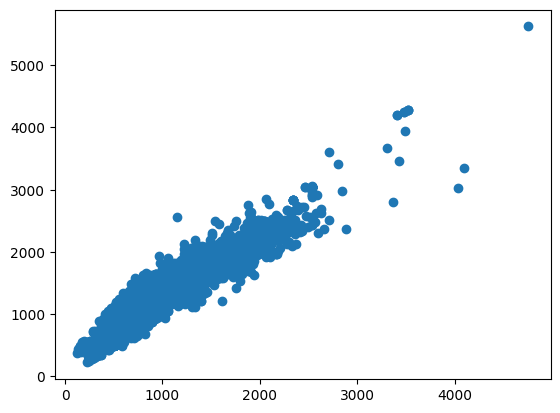

In [7]:
shapes = np.array([img.shape for img in imgs])
plt.scatter(shapes[:,0], shapes[:,1])
plt.show()

In [40]:
# get the "median" image in the scatterplot
pairwise_distances = np.linalg.norm(shapes[:, np.newaxis] - shapes, axis=2)
distance_sums = np.sum(pairwise_distances, axis=1)

print("height vs width of median-sized image")
median_figure_shape = shapes[np.argmin(distance_sums)]
median_figure_shape

width vs height of median 2D point


array([ 864, 1208])

Resize images

In [4]:
for subfolder in subfolders:
    for ty in image_types:
        img_paths = utils.get_image_paths(f"{data_base_path}/{subfolder}/{ty}", n=-1)
        out_path = f"{processed_base_path}/{subfolder}/{ty}/"
        utils.resize_images_parallel(img_paths, 864, 1208, out_path)